Enter the PlayerID # for the player who's shot chart from the 2017/2018 season you would like to see.
Some popular PlayerID's: 
     Lebron James = 2544
     Carmello Anthony = 2546
     Kristaps Porzingis = 204001
     James Harden = 201935
Enter PlayerID Here: 2546


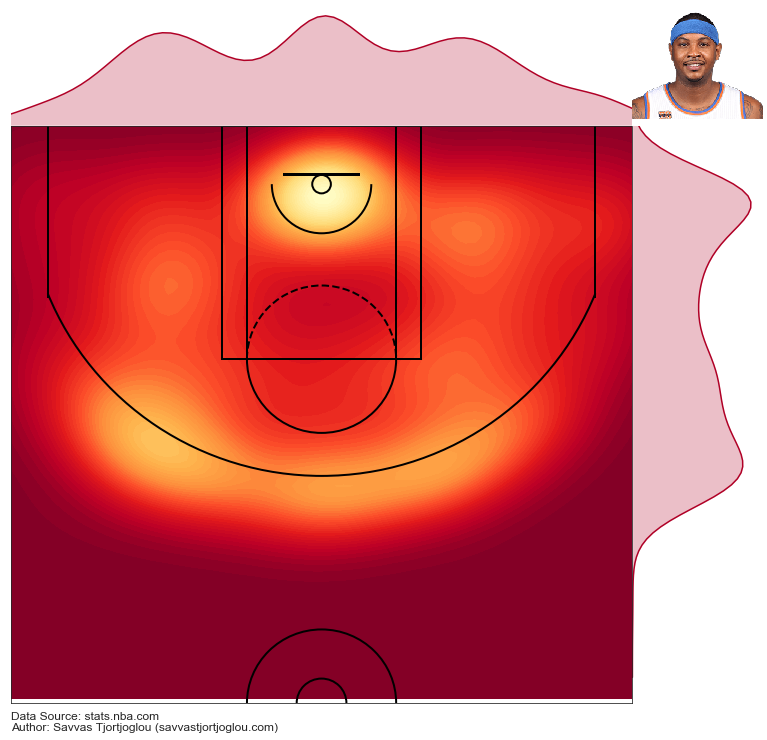

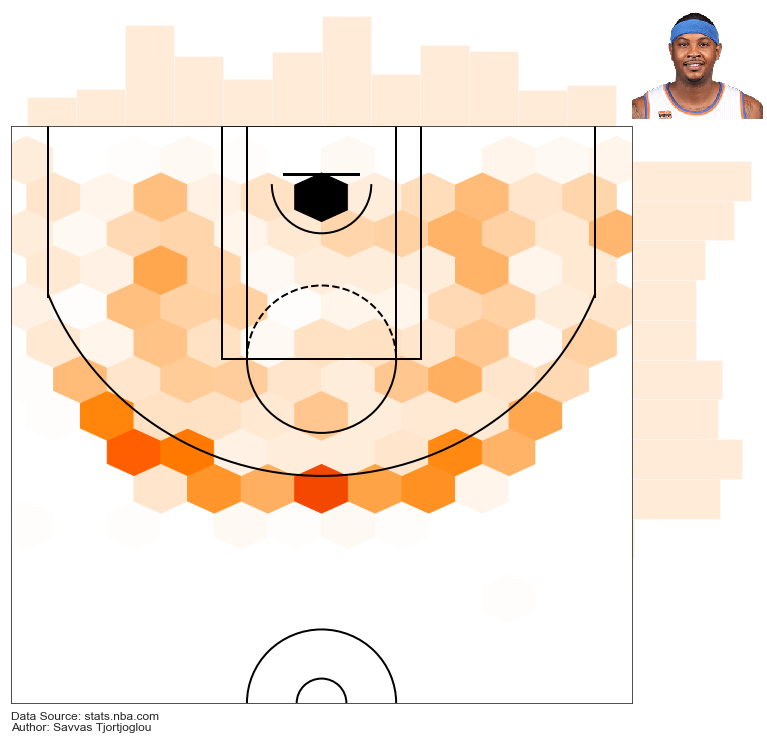

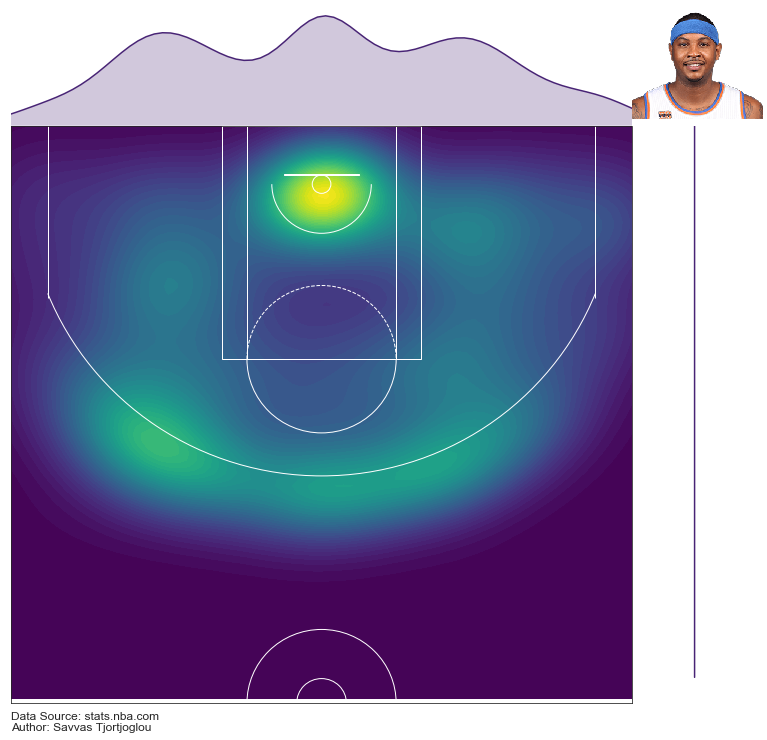

In [5]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.offsetbox import  OffsetImage

#Getting the data from stats.nba.com is pretty straightforward.
#add &CFID to link fix API error as found on
#Kristaps playerid:
#The above url sends us to the JSON file contatining the data we want.
# Also note that the url contains the various API parameters used to acces
# s the data. The PlayerID parameter in the url is set to 201935, which is
# James Harden's PlayerID.
#Harden playerid: 201935
#Porzingis PlayerID - 204001
#Lebron PlayerID - 2544
#Found correct link using Chrome Developer tools as explained here https://towardsdatascience.com/using-python-pandas-and-plotly-to-generate-nba-shot-charts-e28f873a99cb
#Correct link: https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=204001&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
print("Enter the PlayerID # for the player who's shot chart from the 2017/2018 season you would like to see.")
print("Some popular PlayerID's: ")
print("     Lebron James = 2544")
print("     Carmello Anthony = 2546")
print("     Kristaps Porzingis = 204001")
print("     James Harden = 201935")
player_id = input("Enter PlayerID Here: ")


#player_id = 2544
shot_data_url_start = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID='
shot_data_url_end = '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
shot_chart_url = shot_data_url_start + str(player_id) + shot_data_url_end
#Use 'requests' to get the data
#Set a User Agent to make NBA.com think my Python code is a browser.
agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
# Get the webpage containing the data
response = requests.get(shot_chart_url, headers=agent)
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

#Create a pandas DataFrame using the scraped shot chart data.
shot_df = pd.DataFrame(shots, columns=headers)
# View the head of the DataFrame and all its columns
from IPython.display import display
#with pd.option_context('display.max_columns', None):
    #display(shot_df.head())

#Lets just quickly plot the data just too see how it looks.
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
#plt.close()
#Please note that the above plot misrepresents the data. The x-axis values
# are the inverse of what they actually should be. Lets plot the shots taken
#  from only the right side to see this issue.
right = shot_df[shot_df.SHOT_ZONE_AREA == "Right Side"]
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
#plt.show()
plt.close()


#Drawing the Court
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
#plt.show()
#court
plt.close()

#Creating some Shot Charts
#Now plot our properly adjusted shot chart data along with the court.
# We can adjust the x-values in two ways. We can either pass in the the
# negative inverse of LOC_X to plt.scatter or we can pass in descending
# values to plt.xlim. We'll do the latter to plot our shot chart.
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
#plt.show()
#court upside down
plt.close()

#Lets orient our shot chart with the hoop by the top of the chart,
# which is the same orientation as the shot charts on stats.nba.com.
# We do this by settting descending y-values from the bottom to the top
#  of the y-axis.
# When we do this we no longer need to adjust the x-values of our plot.
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
#plt.show()
#court rightside up
plt.close()

#Lets create a few shot charts using jointplot from seaborn.
# create our jointplot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)
joint_shot_chart.fig.set_size_inches(12,11)
# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)
# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
# Add a title
ax.set_title(' Season',
             y=1.2, fontsize=18)
# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12)
#plt.show()
#court right  side up with histogram
plt.close()



import urllib.request
# we pass in the link to the image as the 1st argument
# the 2nd argument tells urlretrieve what we want to scrape
#pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201935.png",
                                #"201935.png")

pic_link_start = 'http://stats.nba.com/media/players/230x185/'
pic_link_end = '.png'
pic_link = pic_link_start + str(player_id) + pic_link_end
scrape_link = str(player_id) + '.png'
pic = urllib.request.urlretrieve(pic_link,
                                scrape_link)
# pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201935.png",
#                                 "201935.png")
# urlretrieve returns a tuple with our image as the first
# element and imread reads in the image as a
# mutlidimensional numpy array so matplotlib can plot it
player_pic = plt.imread(pic[0])
# plot the image
#plt.imshow(player_pic)
#plt.show()
plt.close()

plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y, color='Purple')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
# add the image
img = OffsetImage(player_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)
#plt.show()
plt.close()



#Now to plot the player's face on a jointplot we will import OffsetImage
# from matplotlib.Offset, which will allow us to place the image at the top
#  right corner of the plot. So lets create our shot chart like we did
# above, but this time we will create a KDE jointplot and at the end add
# on our image.
from matplotlib.offsetbox import  OffsetImage
# create our jointplot
# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r
# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)
# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)
# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)
# Get rid of axisblabels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
# Add a title
ax.set_title('Player FGA \n2017-18 Reg. Season',
             y=1.2, fontsize=18)
# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12)
# Add Player's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough
# to fit on our plot
img = OffsetImage(player_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
img = OffsetImage(player_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)
plt.show()
#heat map with pic
#plt.close()


#And another jointplot but with hexbins.
# create our jointplot
cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.1), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)
# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto
ax = joint_shot_chart.ax_joint
draw_court(ax)
# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
# Add a title
ax.set_title('Shooting Chart', y=1.2, fontsize=14)
# Add Data Source and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou', fontsize=12)
# Add James Harden's image to the top right
img = OffsetImage(player_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)
plt.show()
#hexbins + heat map
#plt.close()

#EDIT: Based on /u/Ogi010 's suggestion, I recreated the KDE plot using the new Viridis matplotlib colormap (which you can find here).
# import the object that contains the viridis colormap
from matplotlib.colors import LinearSegmentedColormap
# Used to reconstruct the colormap in viscm
parameters = {'xp': [22.674387857633945, 11.221508276482126, -14.356589454756971, -47.18817758739222, -34.59001004812521, -6.0516291196352654],
              'yp': [-20.102530541012214, -33.08246073298429, -42.24476439790574, -5.595549738219887, 42.5065445026178, 40.13395157135497],
              'min_JK': 18.8671875,
              'max_JK': 92.5}
cm_data = [[ 0.26700401,  0.00487433,  0.32941519],
       [ 0.26851048,  0.00960483,  0.33542652],
       [ 0.26994384,  0.01462494,  0.34137895],
       [ 0.27130489,  0.01994186,  0.34726862],
       [ 0.27259384,  0.02556309,  0.35309303],
       [ 0.27380934,  0.03149748,  0.35885256],
       [ 0.27495242,  0.03775181,  0.36454323],
       [ 0.27602238,  0.04416723,  0.37016418],
       [ 0.2770184 ,  0.05034437,  0.37571452],
       [ 0.27794143,  0.05632444,  0.38119074],
       [ 0.27879067,  0.06214536,  0.38659204],
       [ 0.2795655 ,  0.06783587,  0.39191723],
       [ 0.28026658,  0.07341724,  0.39716349],
       [ 0.28089358,  0.07890703,  0.40232944],
       [ 0.28144581,  0.0843197 ,  0.40741404],
       [ 0.28192358,  0.08966622,  0.41241521],
       [ 0.28232739,  0.09495545,  0.41733086],
       [ 0.28265633,  0.10019576,  0.42216032],
       [ 0.28291049,  0.10539345,  0.42690202],
       [ 0.28309095,  0.11055307,  0.43155375],
       [ 0.28319704,  0.11567966,  0.43611482],
       [ 0.28322882,  0.12077701,  0.44058404],
       [ 0.28318684,  0.12584799,  0.44496   ],
       [ 0.283072  ,  0.13089477,  0.44924127],
       [ 0.28288389,  0.13592005,  0.45342734],
       [ 0.28262297,  0.14092556,  0.45751726],
       [ 0.28229037,  0.14591233,  0.46150995],
       [ 0.28188676,  0.15088147,  0.46540474],
       [ 0.28141228,  0.15583425,  0.46920128],
       [ 0.28086773,  0.16077132,  0.47289909],
       [ 0.28025468,  0.16569272,  0.47649762],
       [ 0.27957399,  0.17059884,  0.47999675],
       [ 0.27882618,  0.1754902 ,  0.48339654],
       [ 0.27801236,  0.18036684,  0.48669702],
       [ 0.27713437,  0.18522836,  0.48989831],
       [ 0.27619376,  0.19007447,  0.49300074],
       [ 0.27519116,  0.1949054 ,  0.49600488],
       [ 0.27412802,  0.19972086,  0.49891131],
       [ 0.27300596,  0.20452049,  0.50172076],
       [ 0.27182812,  0.20930306,  0.50443413],
       [ 0.27059473,  0.21406899,  0.50705243],
       [ 0.26930756,  0.21881782,  0.50957678],
       [ 0.26796846,  0.22354911,  0.5120084 ],
       [ 0.26657984,  0.2282621 ,  0.5143487 ],
       [ 0.2651445 ,  0.23295593,  0.5165993 ],
       [ 0.2636632 ,  0.23763078,  0.51876163],
       [ 0.26213801,  0.24228619,  0.52083736],
       [ 0.26057103,  0.2469217 ,  0.52282822],
       [ 0.25896451,  0.25153685,  0.52473609],
       [ 0.25732244,  0.2561304 ,  0.52656332],
       [ 0.25564519,  0.26070284,  0.52831152],
       [ 0.25393498,  0.26525384,  0.52998273],
       [ 0.25219404,  0.26978306,  0.53157905],
       [ 0.25042462,  0.27429024,  0.53310261],
       [ 0.24862899,  0.27877509,  0.53455561],
       [ 0.2468114 ,  0.28323662,  0.53594093],
       [ 0.24497208,  0.28767547,  0.53726018],
       [ 0.24311324,  0.29209154,  0.53851561],
       [ 0.24123708,  0.29648471,  0.53970946],
       [ 0.23934575,  0.30085494,  0.54084398],
       [ 0.23744138,  0.30520222,  0.5419214 ],
       [ 0.23552606,  0.30952657,  0.54294396],
       [ 0.23360277,  0.31382773,  0.54391424],
       [ 0.2316735 ,  0.3181058 ,  0.54483444],
       [ 0.22973926,  0.32236127,  0.54570633],
       [ 0.22780192,  0.32659432,  0.546532  ],
       [ 0.2258633 ,  0.33080515,  0.54731353],
       [ 0.22392515,  0.334994  ,  0.54805291],
       [ 0.22198915,  0.33916114,  0.54875211],
       [ 0.22005691,  0.34330688,  0.54941304],
       [ 0.21812995,  0.34743154,  0.55003755],
       [ 0.21620971,  0.35153548,  0.55062743],
       [ 0.21429757,  0.35561907,  0.5511844 ],
       [ 0.21239477,  0.35968273,  0.55171011],
       [ 0.2105031 ,  0.36372671,  0.55220646],
       [ 0.20862342,  0.36775151,  0.55267486],
       [ 0.20675628,  0.37175775,  0.55311653],
       [ 0.20490257,  0.37574589,  0.55353282],
       [ 0.20306309,  0.37971644,  0.55392505],
       [ 0.20123854,  0.38366989,  0.55429441],
       [ 0.1994295 ,  0.38760678,  0.55464205],
       [ 0.1976365 ,  0.39152762,  0.55496905],
       [ 0.19585993,  0.39543297,  0.55527637],
       [ 0.19410009,  0.39932336,  0.55556494],
       [ 0.19235719,  0.40319934,  0.55583559],
       [ 0.19063135,  0.40706148,  0.55608907],
       [ 0.18892259,  0.41091033,  0.55632606],
       [ 0.18723083,  0.41474645,  0.55654717],
       [ 0.18555593,  0.4185704 ,  0.55675292],
       [ 0.18389763,  0.42238275,  0.55694377],
       [ 0.18225561,  0.42618405,  0.5571201 ],
       [ 0.18062949,  0.42997486,  0.55728221],
       [ 0.17901879,  0.43375572,  0.55743035],
       [ 0.17742298,  0.4375272 ,  0.55756466],
       [ 0.17584148,  0.44128981,  0.55768526],
       [ 0.17427363,  0.4450441 ,  0.55779216],
       [ 0.17271876,  0.4487906 ,  0.55788532],
       [ 0.17117615,  0.4525298 ,  0.55796464],
       [ 0.16964573,  0.45626209,  0.55803034],
       [ 0.16812641,  0.45998802,  0.55808199],
       [ 0.1666171 ,  0.46370813,  0.55811913],
       [ 0.16511703,  0.4674229 ,  0.55814141],
       [ 0.16362543,  0.47113278,  0.55814842],
       [ 0.16214155,  0.47483821,  0.55813967],
       [ 0.16066467,  0.47853961,  0.55811466],
       [ 0.15919413,  0.4822374 ,  0.5580728 ],
       [ 0.15772933,  0.48593197,  0.55801347],
       [ 0.15626973,  0.4896237 ,  0.557936  ],
       [ 0.15481488,  0.49331293,  0.55783967],
       [ 0.15336445,  0.49700003,  0.55772371],
       [ 0.1519182 ,  0.50068529,  0.55758733],
       [ 0.15047605,  0.50436904,  0.55742968],
       [ 0.14903918,  0.50805136,  0.5572505 ],
       [ 0.14760731,  0.51173263,  0.55704861],
       [ 0.14618026,  0.51541316,  0.55682271],
       [ 0.14475863,  0.51909319,  0.55657181],
       [ 0.14334327,  0.52277292,  0.55629491],
       [ 0.14193527,  0.52645254,  0.55599097],
       [ 0.14053599,  0.53013219,  0.55565893],
       [ 0.13914708,  0.53381201,  0.55529773],
       [ 0.13777048,  0.53749213,  0.55490625],
       [ 0.1364085 ,  0.54117264,  0.55448339],
       [ 0.13506561,  0.54485335,  0.55402906],
       [ 0.13374299,  0.54853458,  0.55354108],
       [ 0.13244401,  0.55221637,  0.55301828],
       [ 0.13117249,  0.55589872,  0.55245948],
       [ 0.1299327 ,  0.55958162,  0.55186354],
       [ 0.12872938,  0.56326503,  0.55122927],
       [ 0.12756771,  0.56694891,  0.55055551],
       [ 0.12645338,  0.57063316,  0.5498411 ],
       [ 0.12539383,  0.57431754,  0.54908564],
       [ 0.12439474,  0.57800205,  0.5482874 ],
       [ 0.12346281,  0.58168661,  0.54744498],
       [ 0.12260562,  0.58537105,  0.54655722],
       [ 0.12183122,  0.58905521,  0.54562298],
       [ 0.12114807,  0.59273889,  0.54464114],
       [ 0.12056501,  0.59642187,  0.54361058],
       [ 0.12009154,  0.60010387,  0.54253043],
       [ 0.11973756,  0.60378459,  0.54139999],
       [ 0.11951163,  0.60746388,  0.54021751],
       [ 0.11942341,  0.61114146,  0.53898192],
       [ 0.11948255,  0.61481702,  0.53769219],
       [ 0.11969858,  0.61849025,  0.53634733],
       [ 0.12008079,  0.62216081,  0.53494633],
       [ 0.12063824,  0.62582833,  0.53348834],
       [ 0.12137972,  0.62949242,  0.53197275],
       [ 0.12231244,  0.63315277,  0.53039808],
       [ 0.12344358,  0.63680899,  0.52876343],
       [ 0.12477953,  0.64046069,  0.52706792],
       [ 0.12632581,  0.64410744,  0.52531069],
       [ 0.12808703,  0.64774881,  0.52349092],
       [ 0.13006688,  0.65138436,  0.52160791],
       [ 0.13226797,  0.65501363,  0.51966086],
       [ 0.13469183,  0.65863619,  0.5176488 ],
       [ 0.13733921,  0.66225157,  0.51557101],
       [ 0.14020991,  0.66585927,  0.5134268 ],
       [ 0.14330291,  0.66945881,  0.51121549],
       [ 0.1466164 ,  0.67304968,  0.50893644],
       [ 0.15014782,  0.67663139,  0.5065889 ],
       [ 0.15389405,  0.68020343,  0.50417217],
       [ 0.15785146,  0.68376525,  0.50168574],
       [ 0.16201598,  0.68731632,  0.49912906],
       [ 0.1663832 ,  0.69085611,  0.49650163],
       [ 0.1709484 ,  0.69438405,  0.49380294],
       [ 0.17570671,  0.6978996 ,  0.49103252],
       [ 0.18065314,  0.70140222,  0.48818938],
       [ 0.18578266,  0.70489133,  0.48527326],
       [ 0.19109018,  0.70836635,  0.48228395],
       [ 0.19657063,  0.71182668,  0.47922108],
       [ 0.20221902,  0.71527175,  0.47608431],
       [ 0.20803045,  0.71870095,  0.4728733 ],
       [ 0.21400015,  0.72211371,  0.46958774],
       [ 0.22012381,  0.72550945,  0.46622638],
       [ 0.2263969 ,  0.72888753,  0.46278934],
       [ 0.23281498,  0.73224735,  0.45927675],
       [ 0.2393739 ,  0.73558828,  0.45568838],
       [ 0.24606968,  0.73890972,  0.45202405],
       [ 0.25289851,  0.74221104,  0.44828355],
       [ 0.25985676,  0.74549162,  0.44446673],
       [ 0.26694127,  0.74875084,  0.44057284],
       [ 0.27414922,  0.75198807,  0.4366009 ],
       [ 0.28147681,  0.75520266,  0.43255207],
       [ 0.28892102,  0.75839399,  0.42842626],
       [ 0.29647899,  0.76156142,  0.42422341],
       [ 0.30414796,  0.76470433,  0.41994346],
       [ 0.31192534,  0.76782207,  0.41558638],
       [ 0.3198086 ,  0.77091403,  0.41115215],
       [ 0.3277958 ,  0.77397953,  0.40664011],
       [ 0.33588539,  0.7770179 ,  0.40204917],
       [ 0.34407411,  0.78002855,  0.39738103],
       [ 0.35235985,  0.78301086,  0.39263579],
       [ 0.36074053,  0.78596419,  0.38781353],
       [ 0.3692142 ,  0.78888793,  0.38291438],
       [ 0.37777892,  0.79178146,  0.3779385 ],
       [ 0.38643282,  0.79464415,  0.37288606],
       [ 0.39517408,  0.79747541,  0.36775726],
       [ 0.40400101,  0.80027461,  0.36255223],
       [ 0.4129135 ,  0.80304099,  0.35726893],
       [ 0.42190813,  0.80577412,  0.35191009],
       [ 0.43098317,  0.80847343,  0.34647607],
       [ 0.44013691,  0.81113836,  0.3409673 ],
       [ 0.44936763,  0.81376835,  0.33538426],
       [ 0.45867362,  0.81636288,  0.32972749],
       [ 0.46805314,  0.81892143,  0.32399761],
       [ 0.47750446,  0.82144351,  0.31819529],
       [ 0.4870258 ,  0.82392862,  0.31232133],
       [ 0.49661536,  0.82637633,  0.30637661],
       [ 0.5062713 ,  0.82878621,  0.30036211],
       [ 0.51599182,  0.83115784,  0.29427888],
       [ 0.52577622,  0.83349064,  0.2881265 ],
       [ 0.5356211 ,  0.83578452,  0.28190832],
       [ 0.5455244 ,  0.83803918,  0.27562602],
       [ 0.55548397,  0.84025437,  0.26928147],
       [ 0.5654976 ,  0.8424299 ,  0.26287683],
       [ 0.57556297,  0.84456561,  0.25641457],
       [ 0.58567772,  0.84666139,  0.24989748],
       [ 0.59583934,  0.84871722,  0.24332878],
       [ 0.60604528,  0.8507331 ,  0.23671214],
       [ 0.61629283,  0.85270912,  0.23005179],
       [ 0.62657923,  0.85464543,  0.22335258],
       [ 0.63690157,  0.85654226,  0.21662012],
       [ 0.64725685,  0.85839991,  0.20986086],
       [ 0.65764197,  0.86021878,  0.20308229],
       [ 0.66805369,  0.86199932,  0.19629307],
       [ 0.67848868,  0.86374211,  0.18950326],
       [ 0.68894351,  0.86544779,  0.18272455],
       [ 0.69941463,  0.86711711,  0.17597055],
       [ 0.70989842,  0.86875092,  0.16925712],
       [ 0.72039115,  0.87035015,  0.16260273],
       [ 0.73088902,  0.87191584,  0.15602894],
       [ 0.74138803,  0.87344918,  0.14956101],
       [ 0.75188414,  0.87495143,  0.14322828],
       [ 0.76237342,  0.87642392,  0.13706449],
       [ 0.77285183,  0.87786808,  0.13110864],
       [ 0.78331535,  0.87928545,  0.12540538],
       [ 0.79375994,  0.88067763,  0.12000532],
       [ 0.80418159,  0.88204632,  0.11496505],
       [ 0.81457634,  0.88339329,  0.11034678],
       [ 0.82494028,  0.88472036,  0.10621724],
       [ 0.83526959,  0.88602943,  0.1026459 ],
       [ 0.84556056,  0.88732243,  0.09970219],
       [ 0.8558096 ,  0.88860134,  0.09745186],
       [ 0.86601325,  0.88986815,  0.09595277],
       [ 0.87616824,  0.89112487,  0.09525046],
       [ 0.88627146,  0.89237353,  0.09537439],
       [ 0.89632002,  0.89361614,  0.09633538],
       [ 0.90631121,  0.89485467,  0.09812496],
       [ 0.91624212,  0.89609127,  0.1007168 ],
       [ 0.92610579,  0.89732977,  0.10407067],
       [ 0.93590444,  0.8985704 ,  0.10813094],
       [ 0.94563626,  0.899815  ,  0.11283773],
       [ 0.95529972,  0.90106534,  0.11812832],
       [ 0.96489353,  0.90232311,  0.12394051],
       [ 0.97441665,  0.90358991,  0.13021494],
       [ 0.98386829,  0.90486726,  0.13689671],
       [ 0.99324789,  0.90615657,  0.1439362 ]]
test_cm = LinearSegmentedColormap.from_list('__file__', cm_data)
# if __name__ == "__main__":
#     import matplotlib.pyplot as plt
#     import numpy as np
#
#     try:
#         from viscm import viscm
#         viscm(test_cm)
#     except ImportError:
#         print("viscm not found, falling back on simple display")
#         #plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
#                    cmap=test_cm)
#     #plt.show()
# Register and set Viridis as the colormap for the plot
viridis = test_cm
plt.register_cmap(cmap=test_cm)
cmap = plt.get_cmap(viridis.name)
# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)
joint_shot_chart.fig.set_size_inches(12,11)
# A joint plot has 3 Axes, the first one called ax_joint,
# It's the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, color="white", lw=1)
# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
# Add a title
ax.set_title('Player FGA \n2017-18 Reg. Season',
             y=1.2, fontsize=18)
# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou', fontsize=12)
# Add Harden's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough
# to fit on our plot
img = OffsetImage(player_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
ax.add_artist(img)
#ax2.scatter(shot_df.LOC_X, shot_df.LOC_Y)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

# import sys
# print('Python version:', sys.version_info)
# import IPython
# print('IPython version:', IPython.__version__)
# print('Requests verstion', requests.__version__)
# print('Urllib.requests version', urllib.request.__version__)
# import matplotlib as mpl
# print('Matplotlib version:', mpl.__version__)
# print('Seaborn version:', sns.__version__)
# print('Pandas version:', pd.__version__)

